In [85]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('source.csv')

In [87]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [88]:
df.set_index('species', inplace=True)

In [89]:
df.head()

,cannelloni,basil,pastry,filling,leafy,quesadillas,goulash,tomatilla,vegetables,peaches,...,crawfish,beet,tomatillo,cactus,meringue,ranch,octopus,lettuce,peas,mango
species,,,,,,,,,,,,,,,,,,,,,
faecalis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
enterica,1,2,1,1,0,1,0,1,6,0,...,2,0,0,0,2,1,0,18,1,7
vibrio,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
giardia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
shellfish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
target_organisms = ['norovirus', 'salmonella', 'clostridium', 'staphylococcus', 'bacillus', 'escherichia', 'scombroid',
                    'shiga', 'campylobacter', 'ciguatoxin', 'jejuni', 'vibrio', 'shigella', 'listeria',
                    'botulinum', 'hepatitis', 'shellfish', 'cyclospora', 'cryptosporidium']

In [91]:
df = df.loc[target_organisms,:]

In [92]:
df

,cannelloni,basil,pastry,filling,leafy,quesadillas,goulash,tomatilla,vegetables,peaches,...,crawfish,beet,tomatillo,cactus,meringue,ranch,octopus,lettuce,peas,mango
species,,,,,,,,,,,,,,,,,,,,,
norovirus,0,1,9,1,0,0,0,0,25,0,...,1,3,0,1,0,15,0,172,1,0
salmonella,1,2,2,1,0,1,0,1,6,0,...,2,0,0,0,2,1,0,19,1,7
clostridium,0,0,0,0,0,0,2,0,2,0,...,1,4,0,0,0,0,0,5,3,0
staphylococcus,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
bacillus,0,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,2,0,4,2,0
escherichia,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,38,0,0
scombroid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
shiga,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,37,0,0
campylobacter,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,5,2,0


In [93]:
df = df.reset_index()

In [94]:
dfb = df[df['species'] == 'bacillus']

In [95]:
bacillus_rice = int(dfb['rice'])
all_species_rice = df['rice'].sum()
not_bacillus_rice = all_species_rice - bacillus_rice

In [97]:
df.drop('rice', axis=1, inplace=True)

In [98]:
df.set_index('species', inplace=True)

In [99]:
bacillus_not_rice = df.loc['bacillus',:].sum()
all_species_not_rice = df.sum().sum()
not_bacillus_not_rice = all_species_not_rice - bacillus_not_rice

In [100]:
bacillus_not_rice

1124

In [101]:
not_bacillus_not_rice

17544

In [105]:
rice = stats.beta(bacillus_rice, not_bacillus_rice)
not_rice = stats.beta(bacillus_not_rice, not_bacillus_not_rice)

/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if sys.path[0] == '':
/home/jackdougherty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
/home/jackdougherty/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


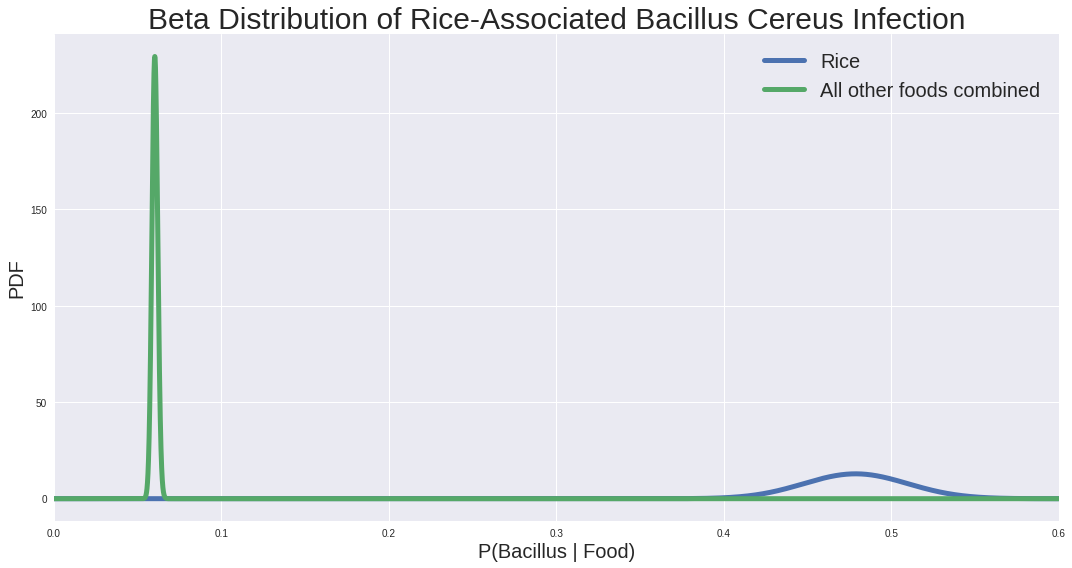

In [119]:
x = np.linspace(0,1,100001)

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(x, rice.pdf(x), label='Rice', linewidth=5)
ax.plot(x, not_rice.pdf(x), label='All other foods combined', linewidth=5)
ax.set_xlabel('P(Bacillus | Food)', size=20)
ax.set_ylabel('PDF', size=20)
ax.set_title('Beta Distribution of Rice-Associated Bacillus Cereus Infection', size=30)
plt.xlim(0,0.6)
plt.legend(fontsize=20)
plt.style.use('seaborn')
plt.tight_layout()
plt.savefig('figures/bacillus_rice');